In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('ola.txt')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.shape

(19104, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [6]:
df.describe(include= 'object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [7]:
df.drop(columns='Unnamed: 0' , inplace= True)

In [8]:
df.rename({'MMM-YY': 'Reporting_Date'},axis= 1, inplace= True)

In [9]:
#Converting all our dated features to DateTime type

df['Reporting_Date'] = pd.to_datetime(df['Reporting_Date'])

df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [10]:
df.head()

,Reporting_Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [11]:
(df.isna().sum()/len(df))*100

Reporting_Date           0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [12]:
df.nunique()


Reporting_Date             24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
num_data = df.select_dtypes('number') #Only taking numerical columns to Impute missing values since KNNImputer can only deal with only numerical values.

In [15]:
num_data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1


In [16]:
num_data.drop(columns= 'Driver_ID', inplace= True) #Dropping Driver ID since this is not needed for imputation
num_cols = num_data.columns 

In [17]:
num_cols

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

#### Using KNN Imputer to fill missing values

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 5, weights= 'uniform', metric= 'nan_euclidean')
imputer.fit(num_data)
new_num_data = imputer.transform(num_data)

In [19]:
new_num_data = pd.DataFrame(new_num_data) #Creating dataframe from the list of transformed values

In [20]:
new_num_data.columns = num_cols #Adding back the column names

In [21]:
new_num_data.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [22]:
new_num_data.isna().sum() #We can see that there are no missing values left in our numerical data

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

#### Concatinating the remaining columns in our original dataframe

In [23]:
df = pd.concat([new_num_data,df[(df.columns).difference(num_cols)]], axis = 1)

In [24]:
df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Dateofjoining,Driver_ID,LastWorkingDate,Reporting_Date
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,C23,2018-12-24,1,NaT,2019-01-01
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,C23,2018-12-24,1,NaT,2019-02-01
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,C23,2018-12-24,1,2019-03-11,2019-03-01
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-11-06,2,NaT,2020-11-01
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-11-06,2,NaT,2020-12-01


#### Checking if the concatination is done correctly

In [25]:
df.loc[df['Driver_ID'] == 2788]

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Dateofjoining,Driver_ID,LastWorkingDate,Reporting_Date
19097,29.0,0.0,2.0,70254.0,2.0,2.0,0.0,1.0,C27,2020-06-08,2788,NaT,2020-06-01
19098,30.0,0.0,2.0,70254.0,2.0,2.0,497690.0,3.0,C27,2020-06-08,2788,NaT,2020-07-01
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,C27,2020-06-08,2788,NaT,2020-08-01
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,C27,2020-06-08,2788,NaT,2020-09-01
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,C27,2020-06-08,2788,NaT,2020-10-01
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,C27,2020-06-08,2788,NaT,2020-11-01
19103,30.0,0.0,2.0,70254.0,2.0,2.0,411480.0,2.0,C27,2020-06-08,2788,NaT,2020-12-01


#### Creating a dictionary to perform Aggregation on different columns at Driver Level

In [26]:
function_dict = {'Reporting_Date':'last',
             'Age':'max',
             'Gender':'last',
             'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'last',
             'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
             'Income':'last',
             'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'last'}

new_train_df = df.groupby(['Driver_ID']).agg(function_dict).reset_index()

In [27]:
new_train_df

,Driver_ID,Reporting_Date,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating
0,1,2019-03-01,28.0,0.0,C23,2.0,2018-12-24,2019-03-11,1.0,1715580.0,57387.0,1.0,2.0
1,2,2020-12-01,31.0,0.0,C7,2.0,2020-11-06,NaT,2.0,0.0,67016.0,2.0,1.0
2,4,2020-04-01,43.0,0.0,C13,2.0,2019-12-07,2020-04-27,2.0,350000.0,65603.0,2.0,1.0
3,5,2019-03-01,29.0,0.0,C9,0.0,2019-01-09,2019-03-07,1.0,120360.0,46368.0,1.0,1.0
4,6,2020-12-01,31.0,1.0,C11,1.0,2020-07-31,NaT,3.0,1265000.0,78728.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34.0,0.0,C24,0.0,2015-10-15,NaT,3.0,21748820.0,82815.0,2.0,4.0
2377,2785,2020-10-01,34.0,1.0,C9,0.0,2020-08-28,2020-10-28,1.0,0.0,12105.0,1.0,1.0
2378,2786,2019-09-01,45.0,0.0,C19,0.0,2018-07-31,2019-09-22,2.0,2815090.0,35370.0,2.0,1.0
2379,2787,2019-06-01,28.0,1.0,C20,2.0,2018-07-21,2019-06-20,1.0,977830.0,69498.0,1.0,1.0


### Mapping our Target variable with 0 and 1

In [28]:
# Assigning 1 to drivers who has left (has a last working day) and 0 to drivers who are still working

new_train_df['target'] = np.where(pd.notnull(new_train_df['LastWorkingDate']),1 ,0)

In [29]:
new_train_df.head()

,Driver_ID,Reporting_Date,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,target
0,1,2019-03-01,28.0,0.0,C23,2.0,2018-12-24,2019-03-11,1.0,1715580.0,57387.0,1.0,2.0,1
1,2,2020-12-01,31.0,0.0,C7,2.0,2020-11-06,NaT,2.0,0.0,67016.0,2.0,1.0,0
2,4,2020-04-01,43.0,0.0,C13,2.0,2019-12-07,2020-04-27,2.0,350000.0,65603.0,2.0,1.0,1
3,5,2019-03-01,29.0,0.0,C9,0.0,2019-01-09,2019-03-07,1.0,120360.0,46368.0,1.0,1.0,1
4,6,2020-12-01,31.0,1.0,C11,1.0,2020-07-31,NaT,3.0,1265000.0,78728.0,3.0,2.0,0


#### We can check if the driver is happy by checking if the Quarterly Rating has increased or the Income has increased. 

#### Creating a column which tells us if the Quarterly rating has increased for that Driver.

In [30]:
df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Dateofjoining,Driver_ID,LastWorkingDate,Reporting_Date
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,C23,2018-12-24,1,NaT,2019-01-01
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,C23,2018-12-24,1,NaT,2019-02-01
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,C23,2018-12-24,1,2019-03-11,2019-03-01
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-11-06,2,NaT,2020-11-01
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-11-06,2,NaT,2020-12-01


In [31]:
QR1 = df.groupby('Driver_ID')[['Quarterly Rating']].first().reset_index()
QR2 = df.groupby('Driver_ID')[['Quarterly Rating']].last().reset_index()

In [32]:
QR = (QR2['Quarterly Rating'] > QR1['Quarterly Rating']).reset_index()

In [33]:
# Checking if the difference in last quarter rating and first quarter rating is greater than 0, if it is then the driver was promoted.

new_train_df['Quarterly_Rating_Increased'] = np.where(QR2['Quarterly Rating'] - QR1['Quarterly Rating'] > 0, 1, 0)

#### Checking if the Income was increased for a Driver

In [34]:
first_income = df.groupby('Driver_ID')[['Income']].first().reset_index()
last_income = df.groupby('Driver_ID')[['Income']].last().reset_index()


In [35]:
new_train_df['IncomeIncreased'] = np.where(last_income['Income'] - first_income['Income'] > 0, 1, 0)

In [36]:
new_train_df['IncomeIncreased'].value_counts()

IncomeIncreased
0    2338
1      43
Name: count, dtype: int64

In [37]:
new_train_df.head()

,Driver_ID,Reporting_Date,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,target,Quarterly_Rating_Increased,IncomeIncreased
0,1,2019-03-01,28.0,0.0,C23,2.0,2018-12-24,2019-03-11,1.0,1715580.0,57387.0,1.0,2.0,1,0,0
1,2,2020-12-01,31.0,0.0,C7,2.0,2020-11-06,NaT,2.0,0.0,67016.0,2.0,1.0,0,0,0
2,4,2020-04-01,43.0,0.0,C13,2.0,2019-12-07,2020-04-27,2.0,350000.0,65603.0,2.0,1.0,1,0,0
3,5,2019-03-01,29.0,0.0,C9,0.0,2019-01-09,2019-03-07,1.0,120360.0,46368.0,1.0,1.0,1,0,0
4,6,2020-12-01,31.0,1.0,C11,1.0,2020-07-31,NaT,3.0,1265000.0,78728.0,3.0,2.0,0,1,0


### Statistical Summary

In [38]:
new_train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Reporting_Date,2381,2020-03-31 15:04:09.475010560,2019-01-01 00:00:00,2019-09-01 00:00:00,2020-06-01 00:00:00,2020-12-01 00:00:00,2020-12-01 00:00:00,NaN
Age,2381.0,33.770181,21.0,30.0,33.0,37.0,58.0,5.933265
Gender,2381.0,0.410584,0.0,0.0,0.0,1.0,1.0,0.491496
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Dateofjoining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Grade,2381.0,2.096598,1.0,1.0,2.0,3.0,5.0,0.941522
Total Business Value,2381.0,4586741.822764,-1385530.0,0.0,817680.0,4173650.0,95331060.0,9127115.313446
Income,2381.0,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384


#### Observations:
1. There are 2381 unique drivers in this dataset.
2. The mean age of driver is 33.77 and the median is also the same. The maximum age is of 58 years.
3. We can also see that the mean and median Income is almost same with 59334 and 55315 respectively.
4. The maximum income is 188,418 which looks like an outlier because the 75% of the employees have an income which is less than 75986.
5. 50% of the employees have acquired 817680.0 total business value

In [39]:
new_train_df.describe(include= object)

,City
count,2381
unique,29
top,C20
freq,152


##### We are able to see that out of 2381 drivers most were male and prefered to stay in city C20.

In [40]:
new_train_df['target'].value_counts()

target
1    1616
0     765
Name: count, dtype: int64

In [41]:
(new_train_df['target'].value_counts())/len(new_train_df)*100

target
1    67.870643
0    32.129357
Name: count, dtype: float64

##### Out of 2381 drivers, 1616 have left the organization which is 67%.

In [42]:
# Count of observations in each category

n = ['Gender','City', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Quarterly_Rating_Increased', 'IncomeIncreased']

for i in n:
    print(new_train_df[i].value_counts())
    print("*"*40)

Gender
0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: count, dtype: int64
****************************************
City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64
****************************************
Education_Level
2.0    802
1.0    795
0.0    784
Name: count, dtype: int64
****************************************
Joining Designation
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: count, dtype: int64
****************************************
Grade
2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: count, dtype: int64
****************************************
Quarterly Rating
1.0    1744
2.0     362
3.0     168
4.0     107
Name: count, dtype:

##### Observations:
1. Out of 2381 employees: 1400 are Males and 975 are Females.
2. Out of 2381 employees: The top 2 cities with most drivers are C20 and C15 with 152 and 101 drivers respectively.
3. Out of 2381 employees: 802 are graduates, 795 are 12th pass non-graduates and 784 have only completed education till 10th or less.
4. Out of 2381 employees: 1026 have joined with Grade as 1 and 815 have joined with Grade as 2 and 493 have joined with Grade 3.
5. Out of 2381 employees: 1744 had 1 as their last quarterly rating, 362 had 2 as last quarterly rating.
6. Out of 2381 employees: Only 358 have had their Quarterly Rating increased and 2023 employees didnt have any changes in their quarterly rating.
7. Out of 2381 employees: Only 43 have had their Income increased.

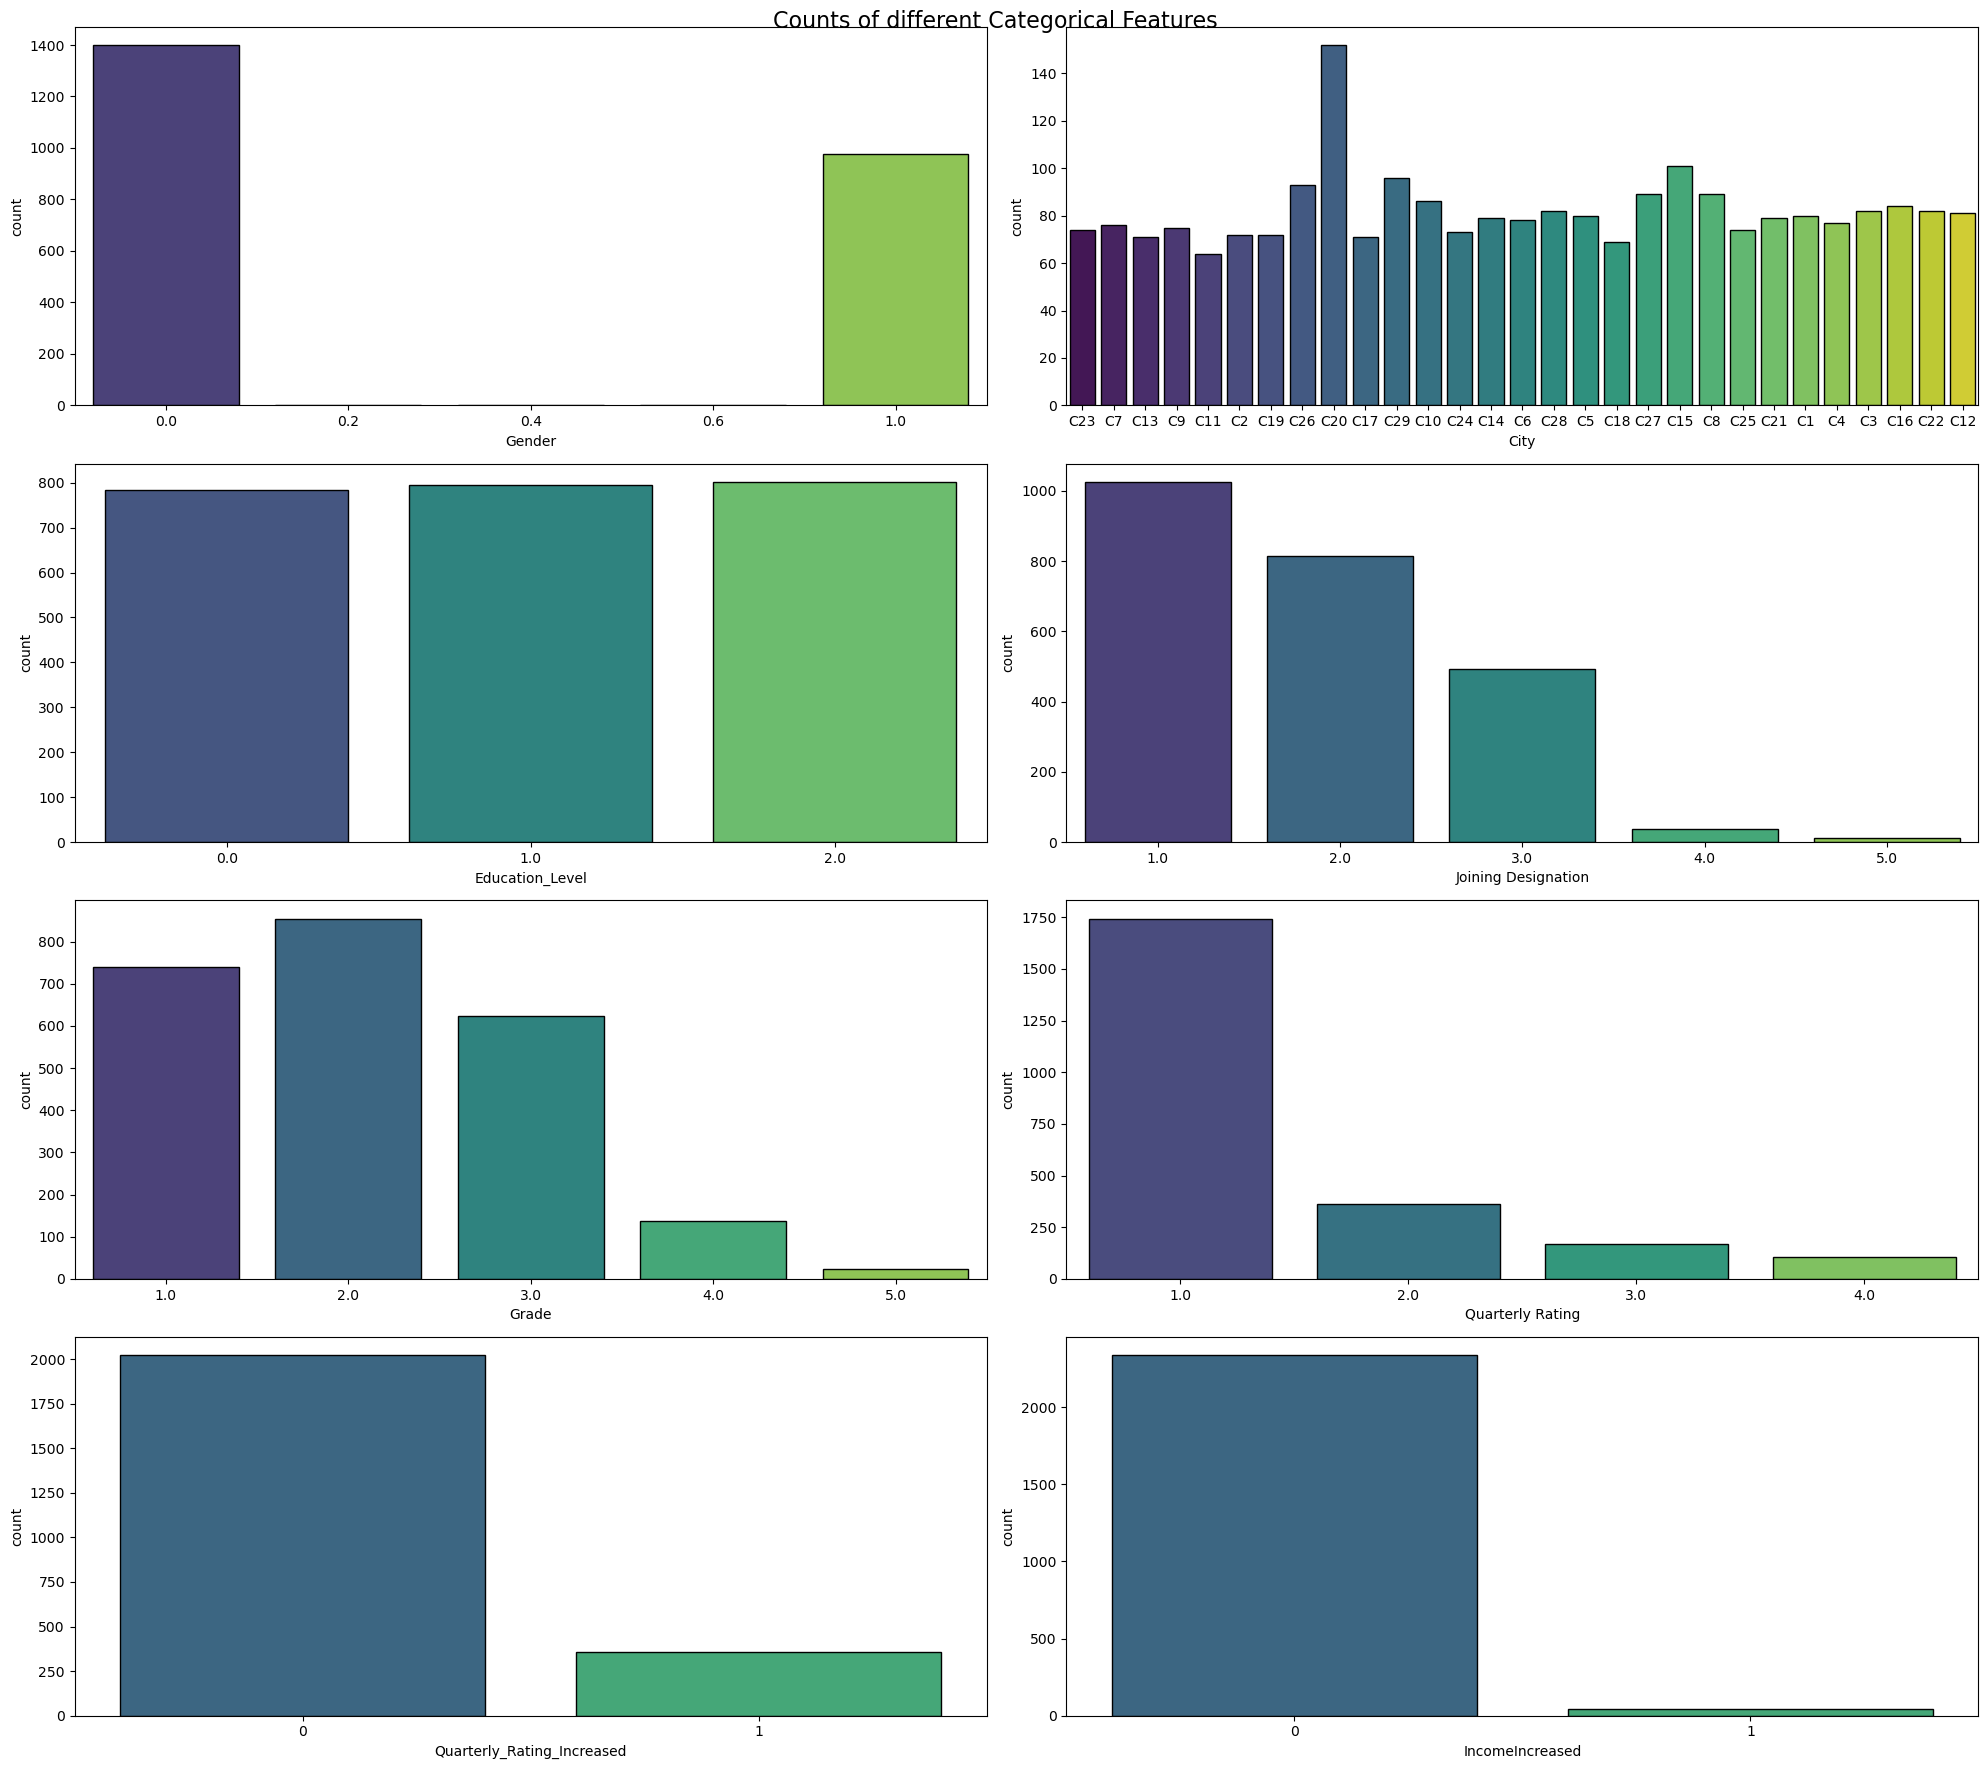

In [43]:
plt.figure(figsize= (20,18))
plt.suptitle('Counts of different Categorical Features', fontsize = 16)
for i in range(len(n)):
    plt.subplot(4,2,i+1)
    sns.countplot(x = new_train_df[n[i]], data = new_train_df, palette= 'viridis', edgecolor = 'black')

plt.tight_layout()

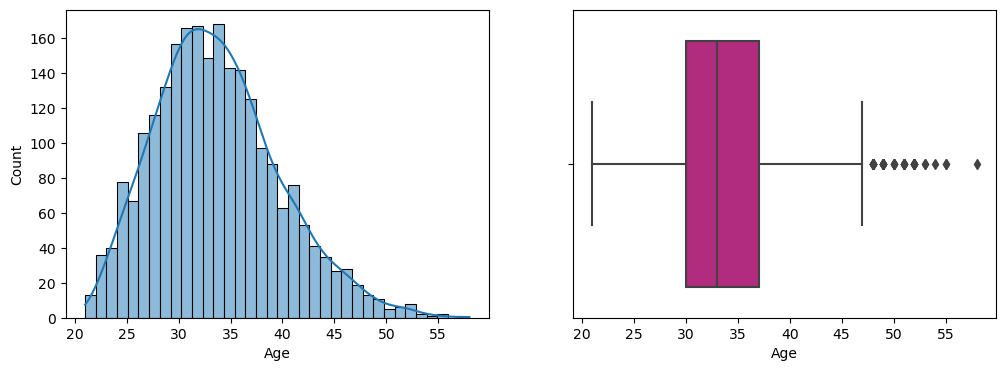

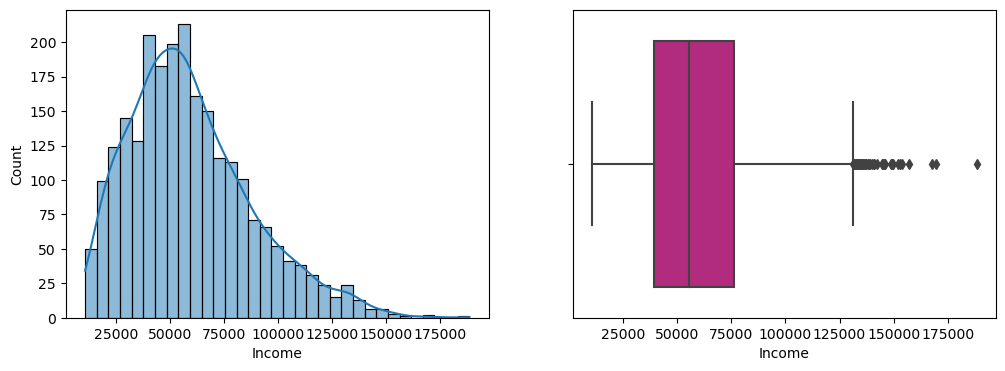

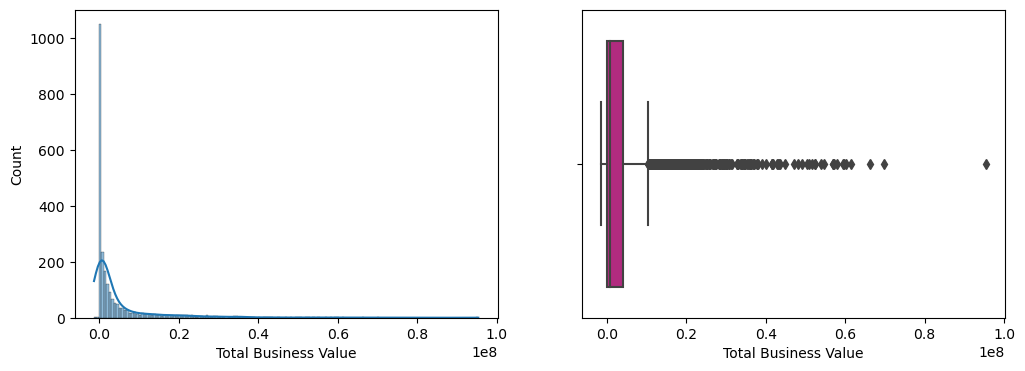

In [44]:
n = ['Age', 'Income', 'Total Business Value']

for i in range(len(n)):
    plt.figure(figsize= (12,4))
    plt.subplot(121)
    sns.histplot(x = n[i], data = new_train_df, kde=True)

    plt.subplot(122)
    sns.boxplot(x = n[i], data = new_train_df, color='mediumvioletred')


##### We can see that the Age, Income and Total Business Value distribition is skewed a little towards right. From the boxplot we can observe that there are outliers several outliers present in Age, Income and Total Business Value features.

In [45]:
# Creating new columns for Year and Month

new_train_df['month'] = new_train_df['Dateofjoining'].dt.month
new_train_df['year'] = new_train_df['Dateofjoining'].dt.year

##### Bi-Variate Analysis with Target variable

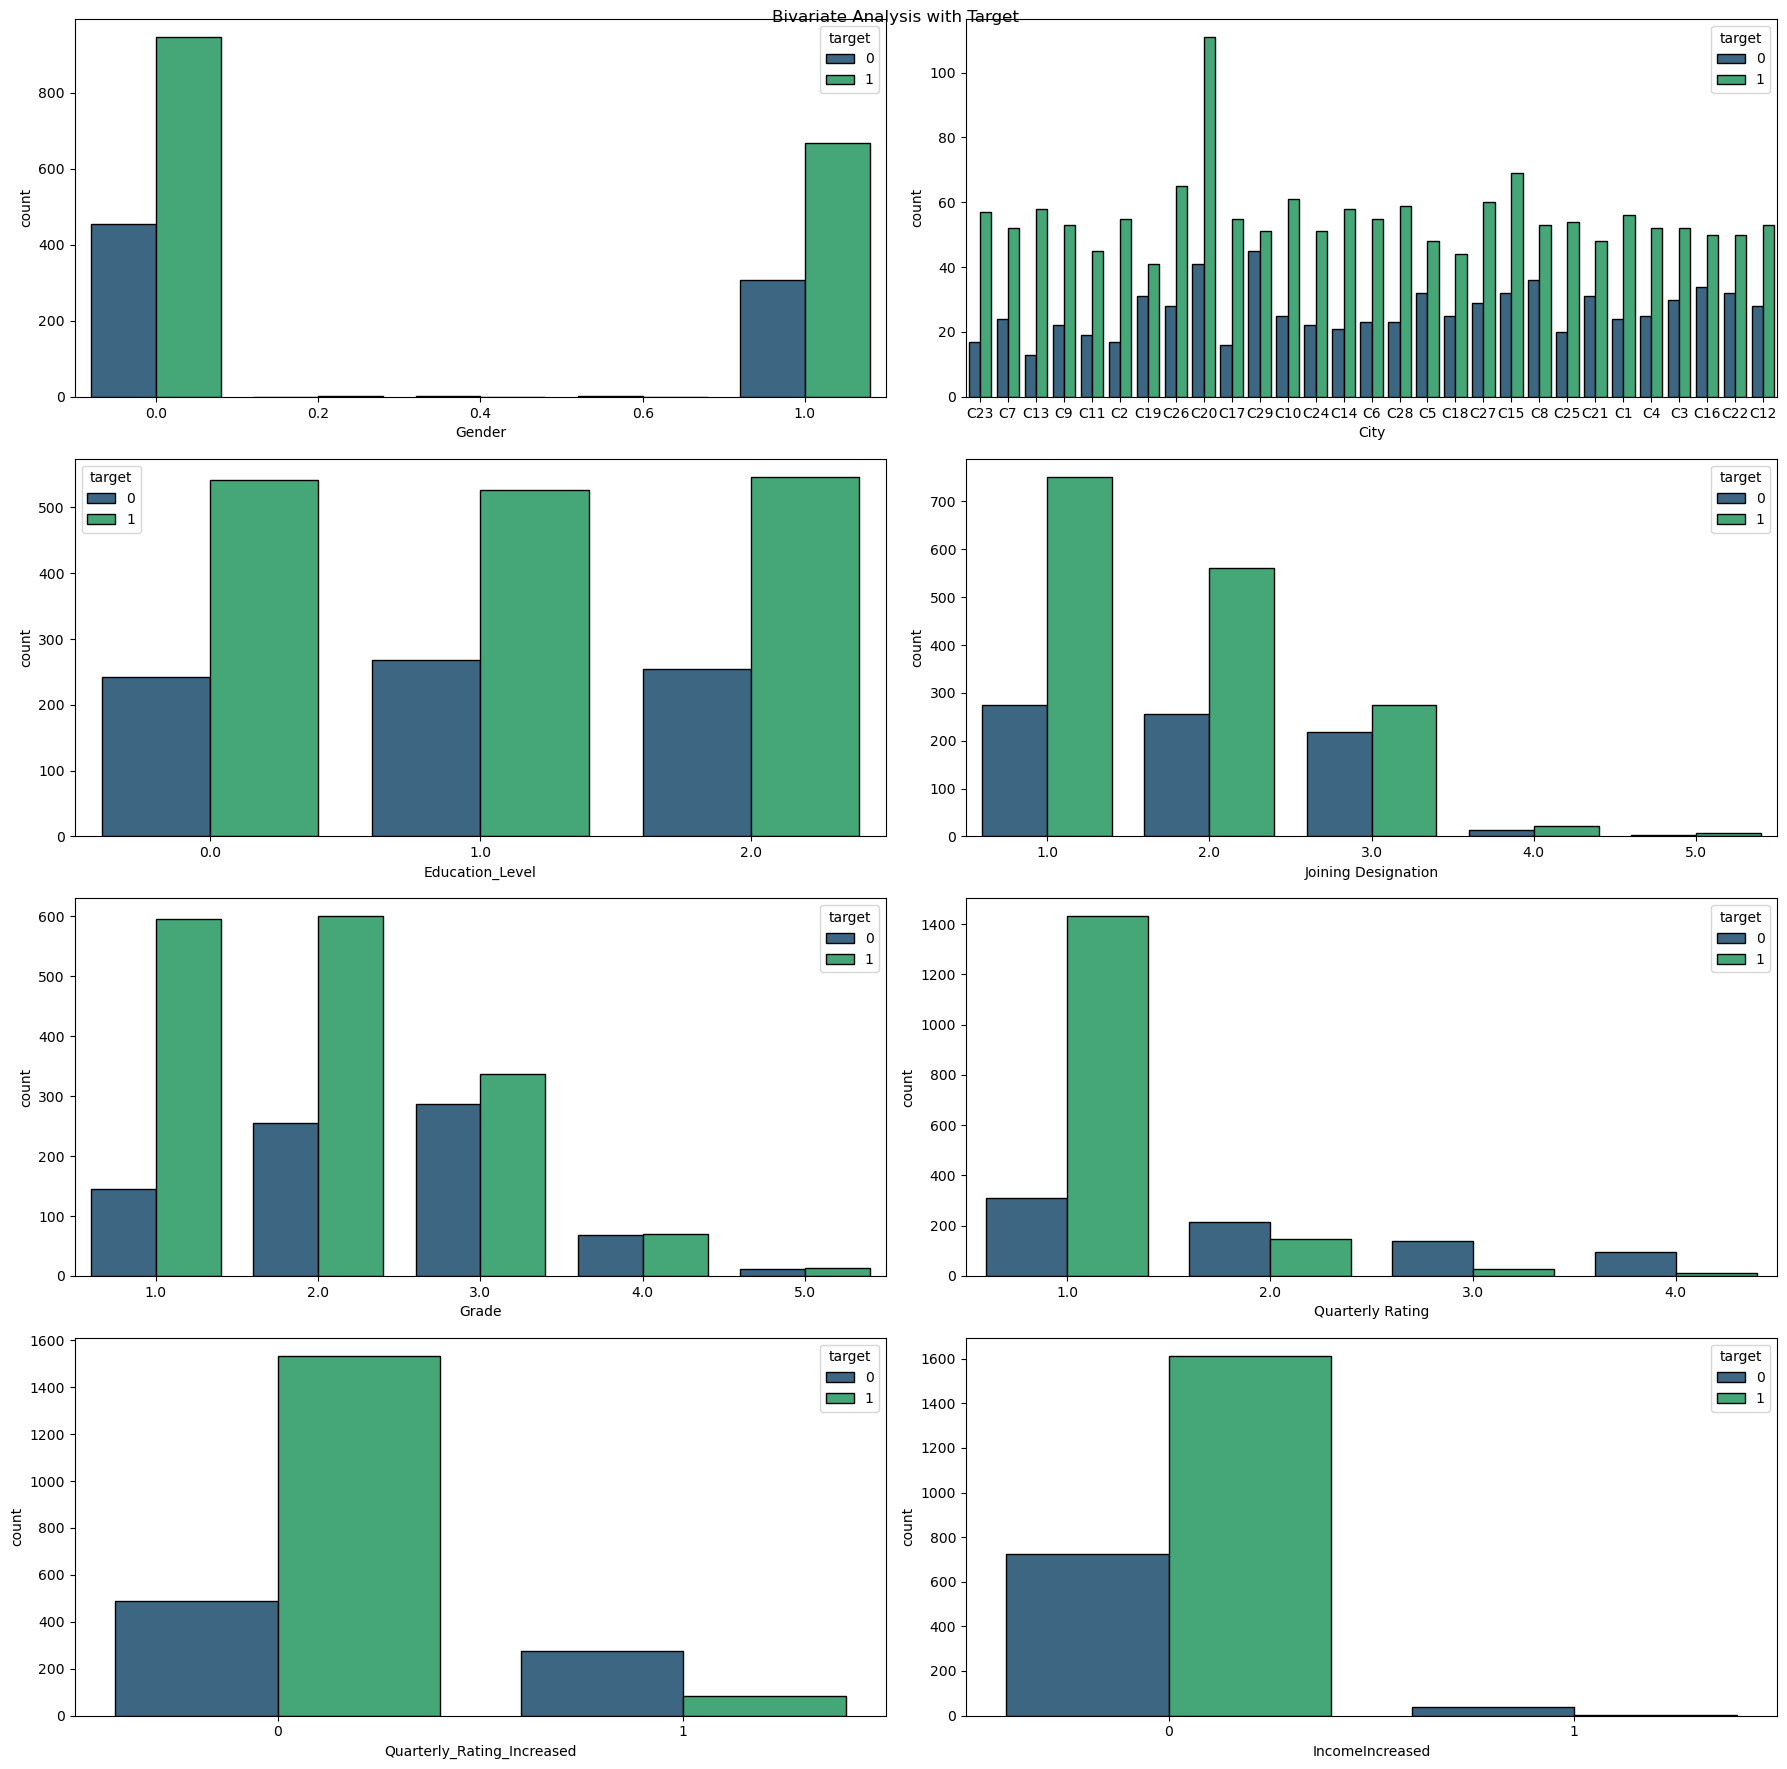

In [46]:
n = ['Gender','City', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Quarterly_Rating_Increased', 'IncomeIncreased']

plt.figure(figsize= (18,18))
plt.suptitle('Bivariate Analysis with Target', fontsize = 12)
for i in range(len(n)):
    plt.subplot(4,2,i+1)
    sns.countplot(x = new_train_df[n[i]], hue = new_train_df['target'], data = new_train_df, palette= 'viridis', edgecolor = 'black')

plt.tight_layout()

##### Observations:
1. Employees with quarterly rating of less than 3 are more likely to leave. 
2. Employees whose quarterly rating did not increase are more likely to leave. 
3. Employees who have had their Income not increased are more likely to leave the organisation

<Axes: xlabel='month', ylabel='count'>

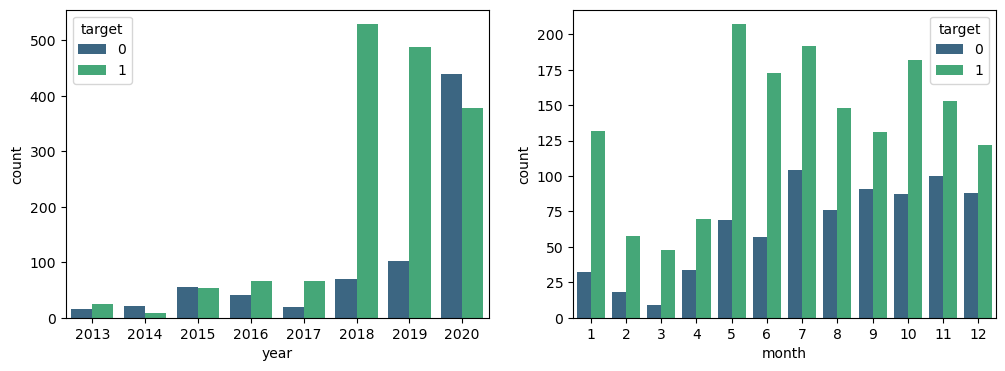

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'year', hue = 'target', data = new_train_df, palette= 'viridis')
plt.subplot(122)
sns.countplot(x = 'month', hue = 'target', data = new_train_df, palette= 'viridis')

In [48]:
# Creating age bins
new_train_df['Age_Bin'] = pd.cut(new_train_df['Age'], bins = [20,30,35,40,45,50,55,60])

<Axes: xlabel='Age_Bin', ylabel='count'>

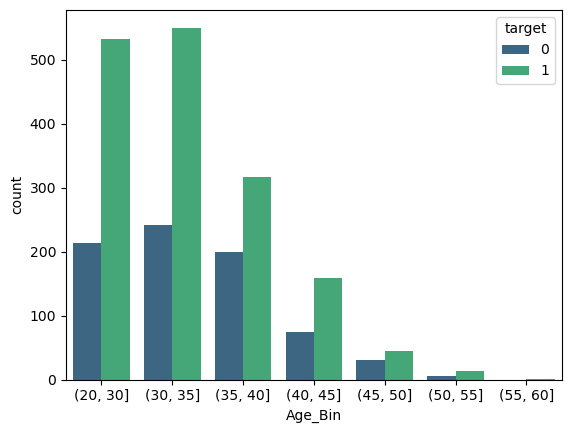

In [49]:
sns.countplot(x = 'Age_Bin', hue = 'target', data = new_train_df, palette= 'viridis')

In [50]:
inc_min = new_train_df['Income'].min()
inc_max = new_train_df['Income'].max()
bins = [inc_min,25000,50000,75000,100000,125000,150000,inc_max]

new_train_df['income_bins'] = pd.cut(df['Income'], bins)

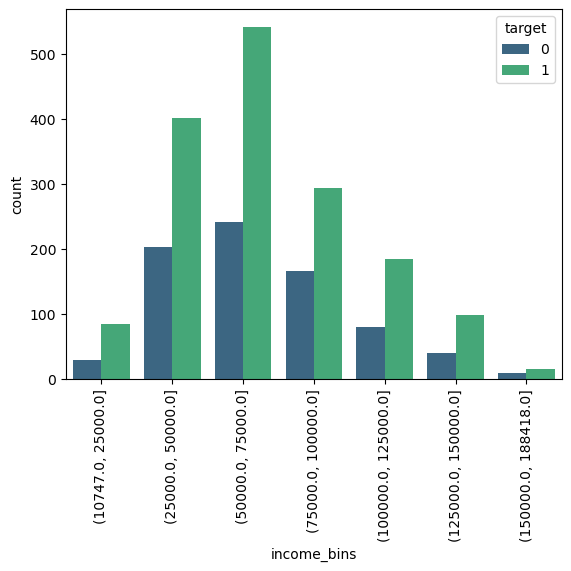

In [51]:
sns.countplot(x = 'income_bins', hue = 'target', data = new_train_df, palette= 'viridis')
plt.xticks(rotation = 90)
plt.show()

##### Employees with income 150k or more are less least to leave. Employees with income of 75k or less are most likely to leave

In [52]:
m1 = new_train_df['Total Business Value'].min()
m2 = new_train_df['Total Business Value'].max()
bins = [m1,80000,2000000,3200000,4400000,5600000,6800000,m2]

new_train_df['TBV_bin'] = pd.cut(df['Total Business Value'], bins)

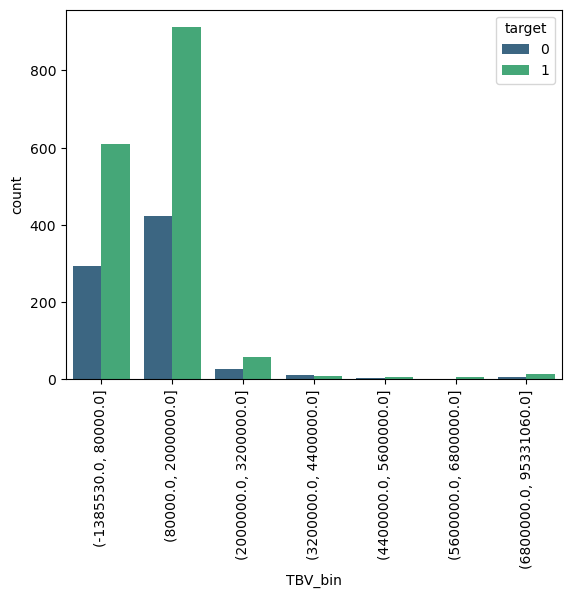

In [53]:
sns.countplot(x = 'TBV_bin', hue = 'target', data = new_train_df, palette= 'viridis')
plt.xticks(rotation = 90)
plt.show()

##### Employees that have contributed less than 2 million Total Buisiness Value are more likely to leave.

In [54]:
#Dropping bin features that we created for our analysis
new_train_df.drop(columns= ['Age_Bin','income_bins','TBV_bin'], axis = 1, inplace= True)

In [55]:
#Dropping datetime features as well
new_train_df.drop(columns=['Reporting_Date','LastWorkingDate','Dateofjoining'], axis = 1, inplace= True)

##### One Hot Encoding

In [56]:
new_train_df = pd.concat([new_train_df, pd.get_dummies(new_train_df['City'], prefix= 'City', dtype= int)], axis = 1)

In [57]:
new_train_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,0.0,C23,2.0,1.0,1715580.0,57387.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,31.0,0.0,C7,2.0,2.0,0.0,67016.0,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,4,43.0,0.0,C13,2.0,2.0,350000.0,65603.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5,29.0,0.0,C9,0.0,1.0,120360.0,46368.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,6,31.0,1.0,C11,1.0,3.0,1265000.0,78728.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0


Dropping the original columns that we have already encoded. 

In [274]:
from sklearn.preprocessing import MinMaxScaler

X = new_train_df.drop(columns=['Driver_ID','target','City','year','month'], axis= 1)
y = np.array(new_train_df['target'])

#storing the column names for later use
X_cols = X.columns

X = pd.DataFrame(X)
X.columns = X_cols

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)


#### Scaling our features

In [275]:
#scaling the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Reshaping our targets to 2 dimensions
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(y_train.shape, y_test.shape)

(1904, 1) (477, 1)


#### Logistic Regression - Hyperparameter Tuning with GridSearchCV

In [278]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight= 'balanced')

params = {
    "penalty": ['l2','l1','elasticnet'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
}

c = GridSearchCV(log_reg, params, cv = 3, scoring= "f1" )

c.fit(X_train, y_train)

def display(results):
    print(f"The best parameters are: {results.best_params_}")
    print(f"The best score is: {results.best_score_}")

display(c)



The best parameters are: {'C': 0.0001, 'penalty': 'l2'}
The best score is: 0.8629099989884303


#### Training our model with best Hyperparameters and running it on our test set

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       166
           1       0.84      0.85      0.84       311

    accuracy                           0.79       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.79      0.79      0.79       477

Logistic Regression score: 0.7945492662473794


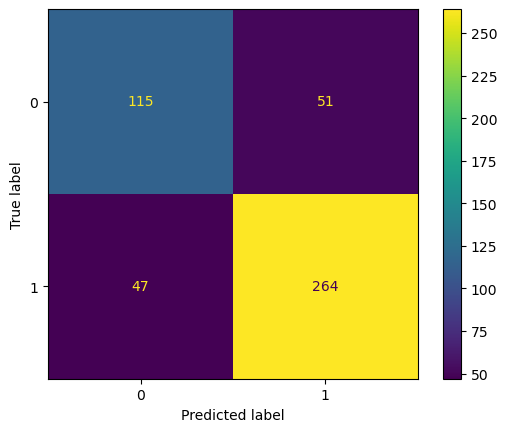

In [279]:
# training log reg with best parameters


log_reg = LogisticRegression(class_weight= 'balanced', penalty= 'l2', C = 1)

log_reg.fit(X_train, y_train)

y_test_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
log_reg_score = log_reg.score(X_test,y_test)
print(f"Logistic Regression score: {log_reg_score}")


ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()


#### ROC AUC SCORE

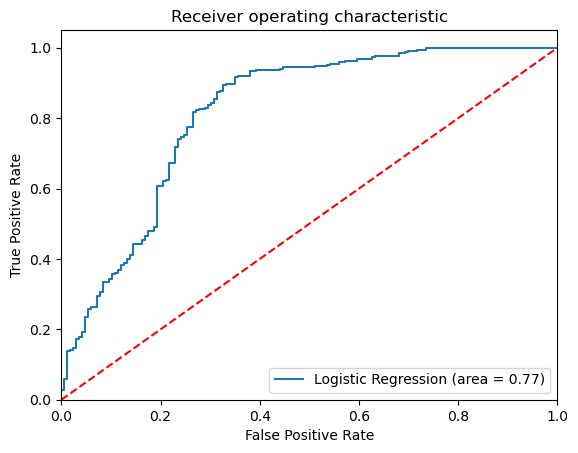

In [280]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,thresholds=roc_curve(y_test,log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest with Class weights - Balanced

In [281]:
from sklearn.utils import class_weight

params = {"max_depth" : [3,4,5,6,7,8,9,10],
          "n_estimators": [50,100,150,200]}

rf = RandomForestClassifier(class_weight = 'balanced')

c = GridSearchCV(rf, params, cv = 3, scoring = 'f1')

c.fit(X_train, y_train)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'The score is : {results.best_score_}')

display(c)


Best parameters are: {'max_depth': 6, 'n_estimators': 200}
The score is : 0.8614006312069692


#### Training our model with best HyperParameters

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       166
           1       0.83      0.91      0.87       311

    accuracy                           0.82       477
   macro avg       0.81      0.78      0.79       477
weighted avg       0.82      0.82      0.81       477

The Random forest score is: 0.8197064989517819


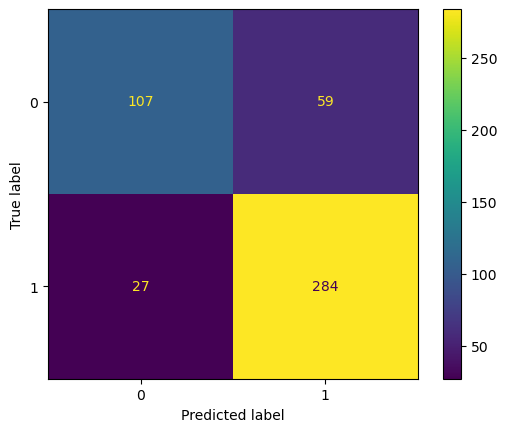

In [282]:
rf = RandomForestClassifier(class_weight= 'balanced', max_depth= 6, n_estimators= 200)

rf.fit(X_train,y_train)

y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

rf_b_score = rf.score(X_test, y_test) 
print(f"The Random forest score is: {rf_b_score}")


ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

#### ROC AUC CURVE

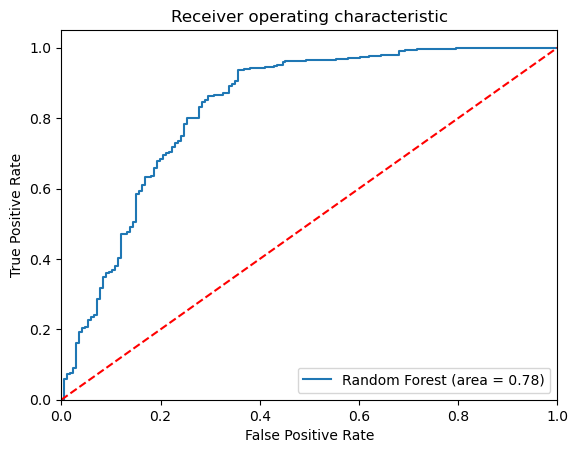

In [283]:
from sklearn.metrics import roc_auc_score, roc_curve

rf_roc_auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,thresholds=roc_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Random Forest with Class weights - Balanced_Subsample

In [284]:
from sklearn.utils import class_weight

params = {"max_depth" : [3,4,5,6,7,8,9,10],
          "n_estimators": [50,100,150,200]}

rf1 = RandomForestClassifier(class_weight = 'balanced_subsample')

c = GridSearchCV(rf1, params, cv = 3, scoring = 'f1')

c.fit(X_train, y_train)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'The score is : {results.best_score_}')

display(c)



Best parameters are: {'max_depth': 8, 'n_estimators': 200}
The score is : 0.8607213943271214


#### Training our model with best Hyperparameters

              precision    recall  f1-score   support

           0       0.80      0.64      0.72       166
           1       0.83      0.92      0.87       311

    accuracy                           0.82       477
   macro avg       0.82      0.78      0.79       477
weighted avg       0.82      0.82      0.82       477

The Random forest score is: 0.8218029350104822


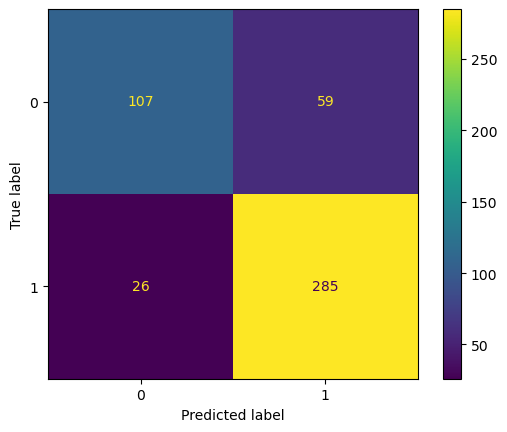

In [285]:
rf1 = RandomForestClassifier(class_weight= 'balanced_subsample', max_depth= 8, n_estimators= 200)

rf1.fit(X_train,y_train)

y_test_pred = rf1.predict(X_test)
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

rf_bs_score = rf1.score(X_test, y_test) 
print(f"The Random forest score is: {rf_bs_score}")

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

#### ROC AUC CURVE

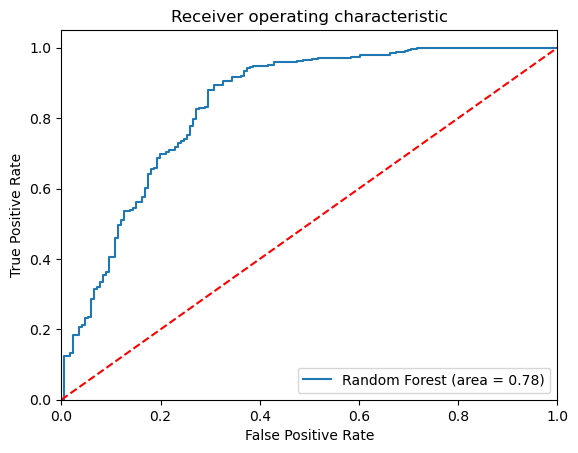

In [286]:
from sklearn.metrics import roc_auc_score, roc_curve

rf1_roc_auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,thresholds=roc_curve(y_test,rf1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest (area = %0.2f)' % rf1_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### XGBoost Classifier - Class weight balanced

In [287]:
from xgboost import XGBClassifier

params = {'eta': [0.3, 0.5, 0.8],
          'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
          "n_estimators": [100, 200, 300, 500],
         'max_depth': [2, 3, 4, 5, 6]}

model = XGBClassifier(class_weight = 'balanced')

c = GridSearchCV(model, params, cv = 3, scoring= 'f1')

c.fit(X_train,y_train)

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'The score is : {results.best_score_}')

display(c)



Best parameters are: {'eta': 0.3, 'gamma': 5, 'max_depth': 6, 'n_estimators': 100}
The score is : 0.8731319380551413


#### Training our model with best Hyperparameter

              precision    recall  f1-score   support

           0       0.86      0.58      0.69       166
           1       0.81      0.95      0.87       311

    accuracy                           0.82       477
   macro avg       0.83      0.76      0.78       477
weighted avg       0.83      0.82      0.81       477

The XGBoost score is: 0.8197064989517819


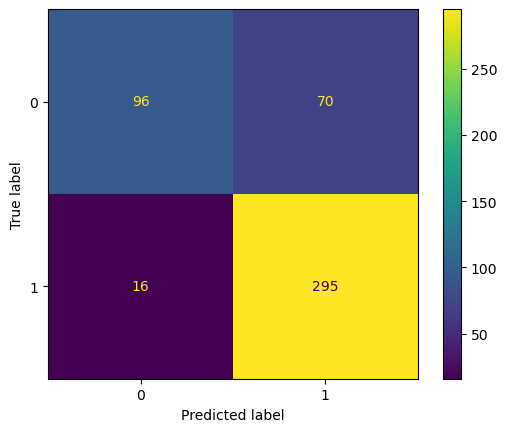

In [288]:
model = XGBClassifier(class_weight = 'balanced', eta = 0.3, gamma = 5, max_depth = 6, n_estimators = 100)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

xgb_score = model.score(X_test, y_test) 
print(f"The XGBoost score is: {xgb_score}")

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

#### ROC AUC CURVE

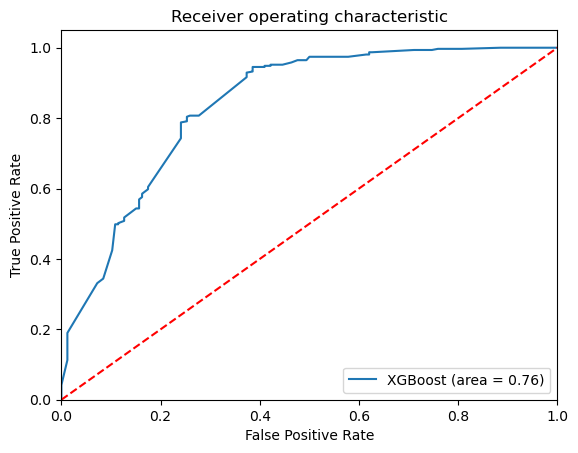

In [289]:
from sklearn.metrics import roc_auc_score, roc_curve

xg_roc_auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='XGBoost (area = %0.2f)' % xg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree Classifier

In [290]:
dt = DecisionTreeClassifier(class_weight= 'balanced')

params = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [2,3,4,5]
}

c = GridSearchCV(dt, params, cv = 3, scoring = "f1")

c.fit(X_train,y_train)

def display(results):
    print(f"The best paramaters are: {results.best_params_}")
    print(f"The score is: {results.best_score_}")

display(c)


The best paramaters are: {'criterion': 'gini', 'max_depth': 4}
The score is: 0.8436395630498309


#### Training our model with best Hyperparameters

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       166
           1       0.81      0.95      0.87       311

    accuracy                           0.82       477
   macro avg       0.83      0.76      0.78       477
weighted avg       0.82      0.82      0.81       477



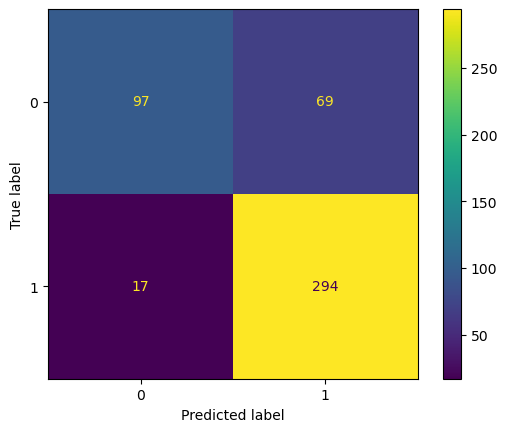

In [291]:
dt = DecisionTreeClassifier(class_weight= 'balanced', criterion= 'gini', max_depth= 4)

dt.fit(X_train, y_train)

y_test_pred = dt.predict(X_test)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

#### ROC AUC CURVE

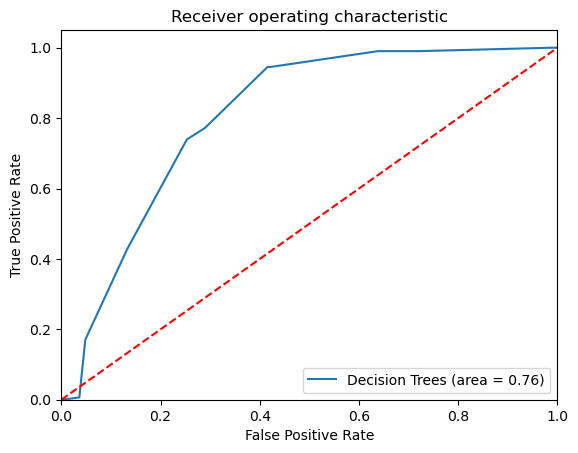

In [292]:
from sklearn.metrics import roc_auc_score, roc_curve

dt_roc_auc=roc_auc_score(y_test,y_test_pred)
fpr,tpr,thresholds=roc_curve(y_test,dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Decision Trees (area = %0.2f)' % dt_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [294]:
d = {"Classifier" : ['XGboost', 'Logistic Regression', 'Random Forest Balanced', 'Random Forest BalSamp', 'Decision Trees'], "Results": [xg_roc_auc, logit_roc_auc, rf_roc_auc, rf1_roc_auc, dt_roc_auc]}

roc_auc_all_models = pd.DataFrame(data = d)

roc_auc_all_models.sort_values(by = 'Results',ascending= False)

,Classifier,Results
3,Random Forest BalSamp,0.780489
2,Random Forest Balanced,0.778881
1,Logistic Regression,0.770823
4,Decision Trees,0.764837
0,XGboost,0.763433


#### Feature Importance of Random Forest (Best performing model)

In [295]:
importances = rf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)
pd.DataFrame(zip(X_cols,std)).sort_values(by = [1], ascending= False)[:10]

,0,1
7,Quarterly Rating,0.197691
4,Total Business Value,0.138599
8,Quarterly_Rating_Increased,0.120201
5,Income,0.052798
3,Grade,0.048551
6,Joining Designation,0.039771
0,Age,0.023804
9,IncomeIncreased,0.019814
2,Education_Level,0.011798
31,City_C29,0.009387


#### Actionable Insights and Recommendations

* Out of 2381 drivers 1616 have left the company.
* We need to incentivise the drivers overtime or other perks to overcome churning
* The employees whose quarterly rating has increased are less likely to leave the organization.
* Company needs to implement the reward system for the customer who provide the feedback and rate drivers
* The employees whose monthly salary has not increased are more likely to leave the organization.
* Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.
* Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
* Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is red flag for the company which needs to regulate.
* Company needs to look why customers are not rating drivers.
* Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features. Company needs to tracks these features as predicators
* We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset. More data will overcome this issue.
* The Random Forest Classifier attains the Recall score of 91% for the driver who left the company. Which indicates that model is performing the decent job.